In [13]:
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exp2_df = pd.read_csv("exp2.csv", header=0)

In [3]:
exp2_df = exp2_df.dropna(how="any")

In [4]:
exp2_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            182, 183, 184, 185, 186, 187, 188, 189, 190, 191],
           dtype='int64', length=192)

In [5]:
exp2_df.columns

Index(['dataset', 'num_train', 'data_augment', 'augment', 'seed', 'test_acc'], dtype='object')

In [6]:
exp2_df.dtypes

dataset          object
num_train         int64
data_augment     object
augment          object
seed              int64
test_acc        float64
dtype: object

In [7]:
exp2_df.describe()

,num_train,seed,test_acc
count,192.000000,192.000000,192.000000
mean,11225.000000,1.989583,0.884660
std,11575.393653,1.436217,0.099818
min,2000.000000,0.000000,0.696600
25%,2500.000000,1.000000,0.854825
50%,6400.000000,2.000000,0.914750
75%,13750.000000,3.000000,0.945700
max,35000.000000,4.000000,0.990500


In [8]:
exp2_df = exp2_df.rename(
    columns={
        "dataset": "dataset",
        "num_train": "train data",
        "data_augment": "data augment",
        "augment": "augment",
        "seed": "seed",
        "test_acc": "accuracy"
    }
)

In [9]:
exp2_df = exp2_df.astype({"accuracy": "float32"})

In [10]:
exp2_df["data augment"] = exp2_df["data augment"].replace("backtranslate", "BT")

In [11]:
exp2_df["augment"] = exp2_df["augment"].replace("adamix", "OoMMix")

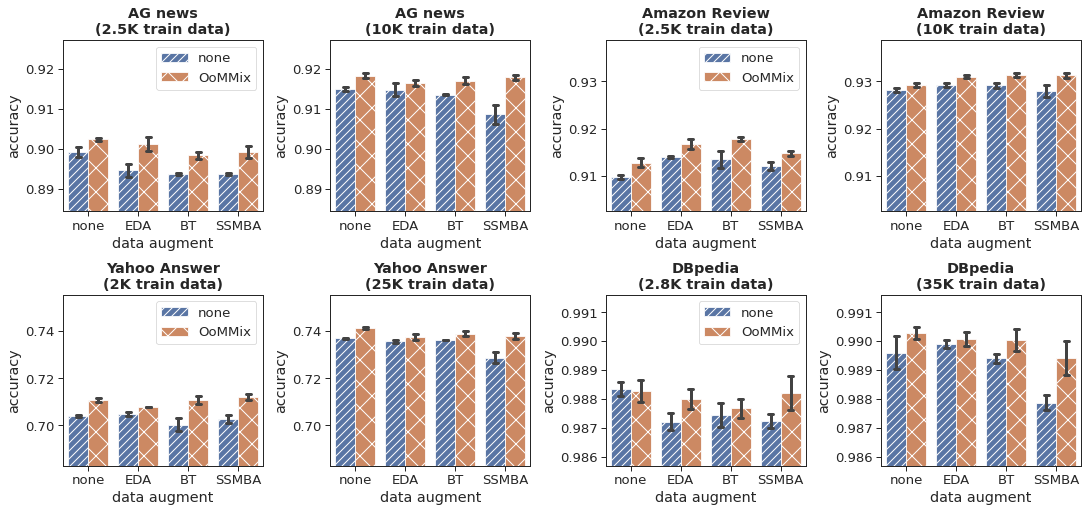

In [14]:

sns.set_theme(context="paper", style="ticks", font_scale=1.5)
fit, axes = plt.subplots(figsize=(15, 7), nrows=2, ncols=4, constrained_layout=True)

def f(df, ax):
    sns.barplot(x="data augment", y="accuracy", hue="augment", ci="sd", data=df, ax=ax, errwidth=3, capsize=.1)
    hatches = cycle(["///", "x", "O"])
    num_augment = len(df["data augment"].unique())
    for i, p in enumerate(ax.patches):
        if i % num_augment == 0:
            h = next(hatches)
        p.set_hatch(h)
    ax.legend(loc='best')
    

f(exp2_df[(exp2_df["dataset"] == "ag_news") & (exp2_df["train data"] == 2500)], axes[0, 0])
f(exp2_df[(exp2_df["dataset"] == "ag_news") & (exp2_df["train data"] == 10000)], axes[0, 1])
f(exp2_df[(exp2_df["dataset"] == "amazon_review") & (exp2_df["train data"] == 2500)], axes[0, 2])
f(exp2_df[(exp2_df["dataset"] == "amazon_review") & (exp2_df["train data"] == 10000)], axes[0, 3])
f(exp2_df[(exp2_df["dataset"] == "yahoo_answer") & (exp2_df["train data"] == 2000)], axes[1, 0])
f(exp2_df[(exp2_df["dataset"] == "yahoo_answer") & (exp2_df["train data"] == 25000)], axes[1, 1])
f(exp2_df[(exp2_df["dataset"] == "dbpedia") & (exp2_df["train data"] == 2800)], axes[1, 2])
f(exp2_df[(exp2_df["dataset"] == "dbpedia") & (exp2_df["train data"] == 35000)], axes[1, 3])

axes[0, 0].set_title("AG news\n(2.5K train data)", fontweight='bold')
axes[0, 1].set_title("AG news\n(10K train data)", fontweight='bold')
axes[0, 2].set_title("Amazon Review\n(2.5K train data)", fontweight='bold')
axes[0, 3].set_title("Amazon Review\n(10K train data)", fontweight='bold')
axes[1, 0].set_title("Yahoo Answer\n(2K train data)", fontweight='bold')
axes[1, 1].set_title("Yahoo Answer\n(25K train data)", fontweight='bold')
axes[1, 2].set_title("DBpedia\n(2.8K train data)", fontweight='bold')
axes[1, 3].set_title("DBpedia\n(35K train data)", fontweight='bold')


def adjust_range(df, axes):
    minv = df["accuracy"].min()
    maxv = df["accuracy"].max()
    for ax in axes:
        ax.set(ylim=(minv-0.3*(maxv-minv), maxv+0.3*(maxv-minv)))
    
adjust_range(exp2_df[(exp2_df["dataset"] == "ag_news")], [axes[0, 0], axes[0, 1]])
adjust_range(exp2_df[(exp2_df["dataset"] == "amazon_review")], [axes[0, 2], axes[0, 3]])
adjust_range(exp2_df[(exp2_df["dataset"] == "yahoo_answer")], [axes[1, 0], axes[1, 1]])
adjust_range(exp2_df[(exp2_df["dataset"] == "dbpedia")], [axes[1, 2], axes[1, 3]])


axes[0, 1].legend([],[], frameon=False)
axes[0, 3].legend([],[], frameon=False)
axes[1, 1].legend([],[], frameon=False)
axes[1, 3].legend([],[], frameon=False)


#plt.savefig(os.path.join("..", "out", "res", "exp2.png"), dpi=500)

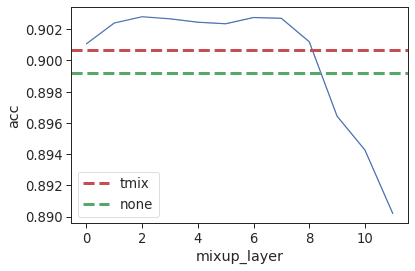

In [108]:
sns.set_theme(context="paper", style="ticks", font_scale=1.5)
df = pd.read_csv(os.path.join("res", "exp4_1.tsv"), delimiter="\t")
ax = sns.lineplot(x="mixup_layer", y="acc", ci=False, data=df, legend=True)

plt.axhline(0.9007, color='r', linestyle='--', linewidth=3, label="tmix")
plt.axhline(0.8992, color='g', linestyle='--', linewidth=3, label="none")

ax.legend()
plt.tight_layout()
plt.savefig(os.path.join("res", "exp4_1.png"))

In [ ]:
sns.set_theme(context="paper", style="ticks", font_scale=1.5)
df = pd.read_csv(os.path.join("res", "exp4_1.tsv"), delimiter="\t")
ax = sns.lineplot(x="mixup_layer", y="acc", ci=False, data=df, legend=True)

plt.axhline(0.9007, color='r', linestyle='--', linewidth=3, label="tmix")
plt.axhline(0.8992, color='g', linestyle='--', linewidth=3, label="none")

ax.legend()
plt.savefig("exp4_1.png")

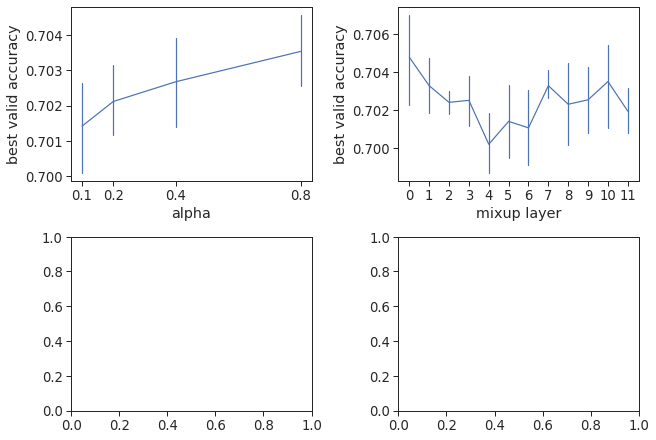

In [109]:
fit, axes = plt.subplots(figsize=(9, 6), nrows=2, ncols=2, constrained_layout=True)

df = pd.read_csv(os.path.join("res", "tuning", "yahoo_answer_tmix_2000.csv"),
                 names=["alpha", "mixup layer", "best valid accuracy"],
                 header=0)
df = df.astype({"alpha": "float32",
                "mixup layer": "int32",
                "best valid accuracy": "float32"})
sns.set_theme(context="paper", style="ticks", font_scale=1.5)
sns.lineplot(x="alpha", y="best valid accuracy", data=df, err_style="bars", ax=axes[0, 0])
axes[0, 0].xaxis.set_ticks(sorted(df["alpha"].unique()))
sns.lineplot(x="mixup layer", y="best valid accuracy", data=df, err_style="bars", ax=axes[0, 1])
axes[0, 1].xaxis.set_ticks(sorted(df["mixup layer"].unique()))

plt.show()

In [117]:
from data import create_train_and_valid_dataset

In [118]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
train_data, valid_data = create_train_and_valid_dataset("ag_news",
                                                        "/data/sh0416/dataset/pdistmix/ag_news_csv",
                                                        tokenizer,
                                                        2500,
                                                        "pandas")

In [122]:
train_data.head()

,input,label
0,"[101, 1996, 5252, 2005, 1996, 2279, 2884, 2452...",1
1,"[101, 3044, 3790, 9440, 4297, 1012, 1010, 1996...",2
2,"[101, 3010, 2811, 1011, 8166, 1006, 18133, 100...",0
3,"[101, 2065, 2017, 2123, 1001, 4464, 1025, 1056...",3
4,"[101, 9706, 1011, 7243, 15794, 4297, 1012, 101...",3


In [123]:
train_token_data = [
    {"context_id": idx, "token_id": token, "label": row["label"]}
    for idx, row in train_data.iterrows()
    for token in row["input"]
]
train_token_df = pd.DataFrame(data=train_token_data)

In [124]:
train_token_df.head()

,context_id,token_id,label
0,0,101,1
1,0,1996,1
2,0,5252,1
3,0,2005,1
4,0,1996,1


In [121]:
train_data["input"].apply(len).sum()

109479

In [40]:
df = pd.DataFrame(data=data, columns=["step", "x"])

28572


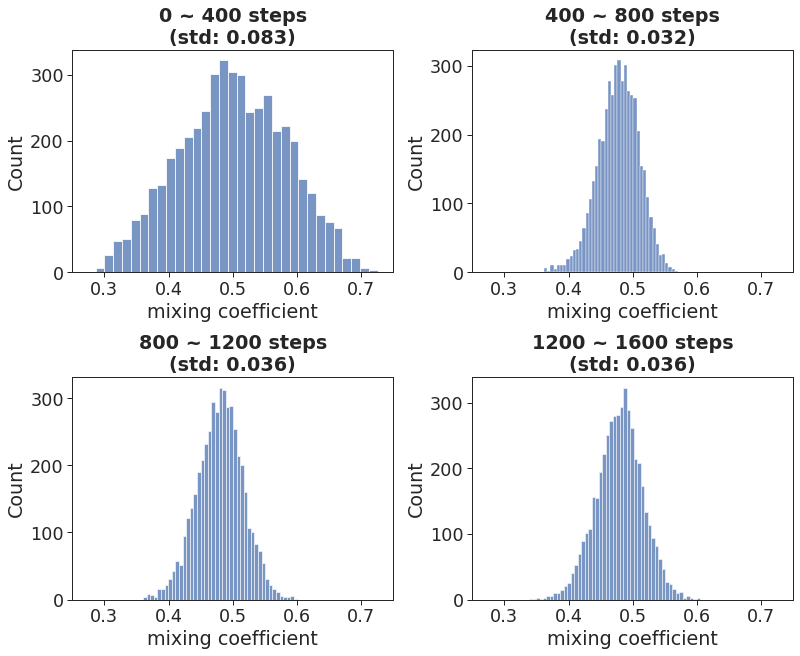

In [29]:
sns.set_theme(context="paper", 
              style="ticks", 
              font_scale=2)
#df = pd.read_csv(os.path.join("..", "out", "gamma", "52151e83-928_gamma.csv"), names=["step", "mixing coefficient"])
df = pd.read_csv(os.path.join("..", "out", "gamma", "59e6c11f-193_gamma.csv"), names=["step", "mixing coefficient"])
df["step"] = df["step"].apply(lambda x: "From %d to %d" % (x//400*400, (x//400+1)*400))

print(len(df))
fig, axes = plt.subplots(figsize=(11, 9), nrows=2, ncols=2, constrained_layout=True)

sns.histplot(data=df[df["step"]=="From 0 to 400"], x="mixing coefficient", ax=axes[0,0], legend=False)
sns.histplot(data=df[df["step"]=="From 400 to 800"], x="mixing coefficient", ax=axes[0,1], legend=False)
sns.histplot(data=df[df["step"]=="From 800 to 1200"], x="mixing coefficient", ax=axes[1,0], legend=False)
sns.histplot(data=df[df["step"]=="From 1200 to 1600"], x="mixing coefficient", ax=axes[1,1], legend=False)


def calculate_std(df):
    return df["mixing coefficient"].std()


axes[0, 0].set_title("0 ~ 400 steps\n(std: %.3f)" % calculate_std(df[df["step"]=="From 0 to 400"]),
                     fontweight='bold')
axes[0, 1].set_title("400 ~ 800 steps\n(std: %.3f)" % calculate_std(df[df["step"]=="From 400 to 800"]),
                     fontweight='bold')
axes[1, 0].set_title("800 ~ 1200 steps\n(std: %.3f)" % calculate_std(df[df["step"]=="From 800 to 1200"]), 
                     fontweight='bold')
axes[1, 1].set_title("1200 ~ 1600 steps\n(std: %.3f)" % calculate_std(df[df["step"]=="From 1200 to 1600"]), 
                     fontweight='bold')


def draw_mean(df, ax):
    mean = df["mixing coefficient"].std()
    print(mean)
    ax.axvline(mean, color='r', linestyle='--', linewidth=3)
    ax.legend({"mean": mean})
    
#draw_mean(df[df["step"]=="From 0 to 400"], axes[0, 0])
#draw_mean(df[df["step"]=="From 400 to 800"], axes[0, 1])
#draw_mean(df[df["step"]=="From 800 to 1200"], axes[1, 0])
#draw_mean(df[df["step"]=="From 1200 to 1600"], axes[1, 1])


axes[0, 0].set(xlim=(0.25, 0.75))
axes[0, 1].set(xlim=(0.25, 0.75))
axes[1, 0].set(xlim=(0.25, 0.75))
axes[1, 1].set(xlim=(0.25, 0.75))
plt.savefig("exp3.png")